# Classification for Data Exploration -- Decision Trees

Before we start, we need to install a couple of things (in this order), which will make it possible to visualize decision trees. 

### Anaconda Environment check

Make sure your Anaconda environment has :
**graphviz**  and **pydotplus**

If the Anaconda doesn't have **pydotplus**, you can use the following command to install it into Anaconda.  Anaconda -> Environments -> base(root) -> Open Terminal:

*conda install -c conda-forge pydotplus*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

Populating the interactive namespace from numpy and matplotlib


In [2]:
# suppress Pandas future warning 
import warnings
warnings.filterwarnings('ignore')

Data from here <href>https://www.kaggle.com/uciml/adult-census-income</href>

In [3]:
df = pd.read_csv('adult.csv')

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Let's try to train a decision tree to predict income

In [5]:
dt = tree.DecisionTreeClassifier(max_depth=2)

In [6]:
type(dt)

sklearn.tree.tree.DecisionTreeClassifier

### Two problems with this data

<ol>
<li>We have null values
<li>We need numbers only
</ol>

## Cleaning the data set

In [7]:
df.head()
# 只能有numbers !!!!
# 变成NAN - ML能识别NAN

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


replace ? with NaN

In [8]:
df.replace(to_replace='?', value=np.nan, inplace=True)

remove education (we already have education.num)

In [9]:
df.drop('education', axis=1,inplace=True)

In [10]:
df['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [11]:
df['native.country'].nunique()

41

In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [13]:
for c in df.columns:
    print (c + ':' + str(df[c].nunique()))

age:73
workclass:8
fnlwgt:21648
education.num:16
marital.status:7
occupation:14
relationship:6
race:5
sex:2
capital.gain:119
capital.loss:92
hours.per.week:94
native.country:41
income:2


make dummy variables for all categorical variables except income

In [14]:
df = pd.get_dummies(df, columns=['workclass','marital.status','occupation',\
                    'relationship','race','sex','native.country'], dummy_na=True)

In [15]:
len(df.columns)

97

In [16]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,90,77053,9,0,4356,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,<=50K,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Make income binary

In [17]:
df['income']=df.income.replace({'<=50K':0.0,'>50K':1.0 })
# income 变成binary之后，做prediction. 

In [18]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,native.country_nan
0,90,77053,9,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,82,132870,9,0,4356,18,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66,186061,10,0,4356,40,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,54,140359,4,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,41,264663,10,0,3900,40,0.0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 97 columns):
age                                          32561 non-null int64
fnlwgt                                       32561 non-null int64
education.num                                32561 non-null int64
capital.gain                                 32561 non-null int64
capital.loss                                 32561 non-null int64
hours.per.week                               32561 non-null int64
income                                       32561 non-null float64
workclass_Federal-gov                        32561 non-null uint8
workclass_Local-gov                          32561 non-null uint8
workclass_Never-worked                       32561 non-null uint8
workclass_Private                            32561 non-null uint8
workclass_Self-emp-inc                       32561 non-null uint8
workclass_Self-emp-not-inc                   32561 non-null uint8
workclass_State-gov            

## Train the decision tree

Make X and Y. Remember to take out the dependent variable from X, or else the classification problem becomes trivial!

In [20]:
Y = df.income

In [21]:
X = df.drop('income', axis=1)

Build the tree

In [22]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualize the tree

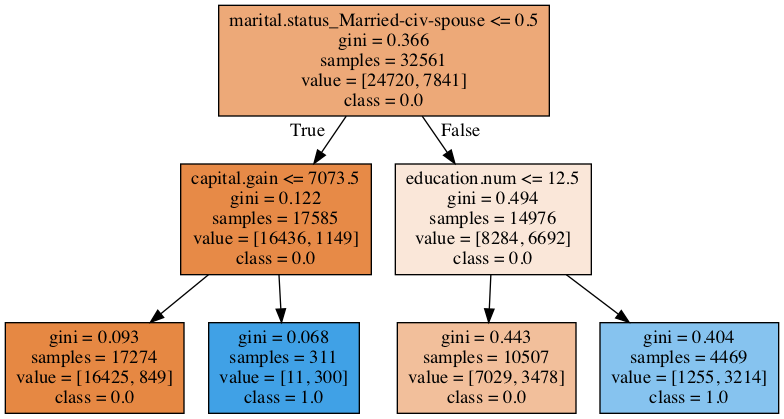

In [23]:
# This code will visualize a decision tree dt, trained with the attributes in X and the class labels in Y
dt_feature_names = list(X.columns)
dt_target_names = [str(s) for s in Y.unique()]
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

### Note : 

For Windows host Anaconda, if you see error 'GraphViz's executables not found.' You can add the following two lines at the beginning of this code section.


import os     
os.environ["PATH"] += os.pathsep +  C:\\Users\\ACTUAL_USERNAME\\Anaconda3\\Library\\bin\\graphviz'


## Validating the finding

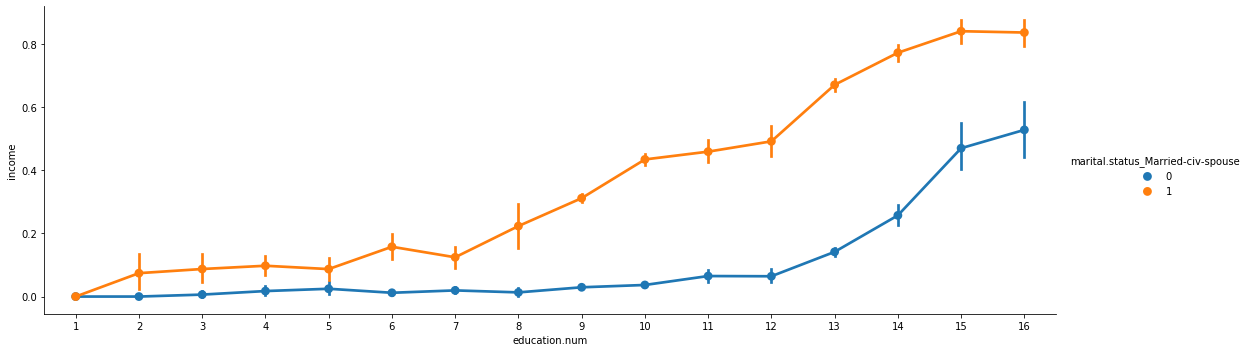

In [24]:
sns.factorplot(x='education.num', y='income', hue='marital.status_Married-civ-spouse', \
               data=df, aspect=3)

Education.num = 12.5 is a good threshold to separate low income from high income, but it is more effective for those married civilly (right part of the tree)


Capital.gain = 7073 is a good threshold to separate low income from high income, but it is more effective for those NOT married civilly (left part of the tree)
